## Sortowanie Przez Wstawianie

In [64]:
def insertion_sort1(T):
    for i in range(1,len(T)):
        pom = T[i]
        j = i
        while j > 0 and T[j-1] > pom:
            T[j] = T[j-1]     # W miejscu T[j] i T[j-1] mamy taką samą wartość, po zakończeniu pętli wartość pom wchodzi w miejsce zdublowanej wartośći
            j = j-1
        T[j] = pom

    return T

In [65]:
print(insertion_sort1([54,26,93,17,77,31,44,55,20]))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


## Czasy Sortowania


Funkcja obliczająca czasy sortowania dla liczby elementów w tablicy.
Wyniki zapisuje w odpowiednich plikach, w dwóch kolumnach - w pierwszej liczba elementów tablicy, a w drugiej czas obliczeń.
Dla przypadku optymistycznego i pesymistycznego wykonuje pojedynczą realizację. 
Dla średniego 10-ciokrotnie powtarza sortowanie, każdorazowo dla nowo wygenerowanych tablic, a do pliku zapisuje średnią wartość.

In [66]:
import random
import time
def test (funkcja,N):
    
    """
    funkcja - wywołanie odpowiedniej funkcji
    N - tablica liczby elementów poszczególnych tablic
    """
    opt=[]
    pes=[]
    sr=[]
    for k in N:
        
        t = []
        for i in range(k): #Kolejne liczby od 0 do k - kolejność rosnąca
            t.append(i)
        
        start = time.time()
        funkcja(t)
        end = time.time()
        opt.append((k,end - start))
        
        t = t[::-1]  #Odwrócona tablica
        start = time.time()
        funkcja(t)
        end = time.time()
        pes.append((k,end - start))

        t =[]
        for i in range(10): #10 tablic o rozmiarze k
            p=[]
            for i in range(k):
                a = random.randint(0, 1000) #Losowe liczby np z przedziału od 0 do 1000
                p.append(a)
            t.append(p)
        
        start = time.time()
        for i in range(10):
            funkcja(t[i])
        end = time.time()
        sr.append((k,(end - start)/10))
      
    with open("%s_sort_opt.dat"% funkcja.__name__[0:3], 'wt') as f:#Dzięki temu możemy mieć zapisy dla dowolnego sortowania
        for x in opt:
            f.write('{0: >4} | {1:f}\n'.format(x[0],x[1]))#czas zapisany jako float - 6 miejsc po przecinku

    with open("%s_sort_pes.dat"% funkcja.__name__[0:3], 'wt') as f:
        for x in pes:
            f.write('{0: >4} | {1:f}\n'.format(x[0],x[1]))
    
    with open("%s_sort_typ.dat"% funkcja.__name__[0:3], 'wt') as f:
        for x in sr:
            f.write('{0: >4} | {1:f}\n'.format(x[0],x[1]))

In [67]:
test(insertion_sort1,[10,102,103,104,105,106])

## Zależność czasu działania sortowania od rozmiaru danych wejściowych

In [68]:
import matplotlib.pyplot as plt
def t(funkcja,N):
    
        """
        funkcja - wywołanie odpowiedniej funkcji
        N - rozmiar danych wejściowych
        """
        test(funkcja,[x for x in range(1,N+1)])
        #utworzenie kolejnych długośći listy od 1 do N
        
        x_o=[] #przechowuje rozmiar danych
        y_o=[] #przechowuje czasy sortowania
        
        # funkcja odczytuje czasy pomiarów z pliku 
        with open("%s_sort_opt.dat" % funkcja.__name__[0:3], 'r', encoding='utf-8') as infile:
            for k in infile:
                x_o.append(int((k.split('|')[0]).replace(" ","")))
                y_o.append(float((k.split('|')[1]).replace(" ","")))
        
        x_p=[] #przechowuje rozmiar danych
        y_p=[] #przechowuje czasy sortowania
        with open("%s_sort_pes.dat" % funkcja.__name__[0:3], 'r', encoding='utf-8') as infile:
            for k in infile:
                x_p.append(int((k.split('|')[0]).replace(" ","")))
                y_p.append(float((k.split('|')[1]).replace(" ","")))

        x_s=[] #przechowuje rozmiar danych
        y_s=[] #przechowuje czasy sortowania
        with open("%s_sort_typ.dat" % funkcja.__name__[0:3], 'r', encoding='utf-8') as infile:
            for k in infile:
                x_s.append(int((k.split('|')[0]).replace(" ","")))
                y_s.append(float((k.split('|')[1]).replace(" ","")))
        
        plt.title("T(N) %s" % funkcja.__name__) # Dzięki temu na wykresie będzie nazwa odpowiedniej funkcji
        plt.ylabel("Czas(s)")
        plt.xlabel("Rozmiar Danych")
        plt.plot(x_o, y_o, 'r--', x_p, y_p, 'bs', x_s, y_s, 'g^')
        plt.legend(('Przypadek Optymistyczny','Przypadek Pesymistyczny','Przypadek Sredni'),loc="upper left")
        plt.show()

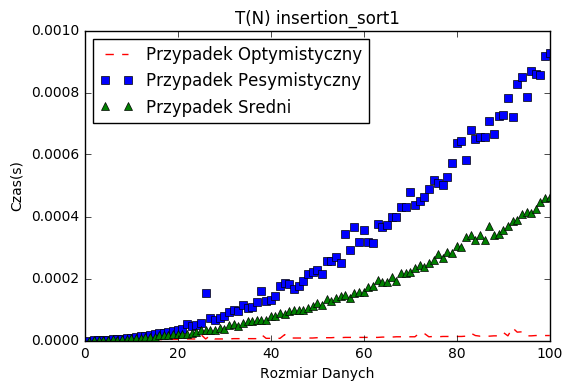

None


In [70]:
print(t(insertion_sort1,100))

## Sortowanie Przez Wybieranie

In [71]:
def selection_sort1(T):
    for i in range(len(T)-1):
        minimum = i
        for j in range(i + 1, len(T)):
            if T[j] < T[minimum]:
                minimum = j

        T[i],T[minimum]= T[minimum],T[i]
    return T

In [72]:
print(selection_sort1([6,3,2,14,9,4,8]))

[2, 3, 4, 6, 8, 9, 14]


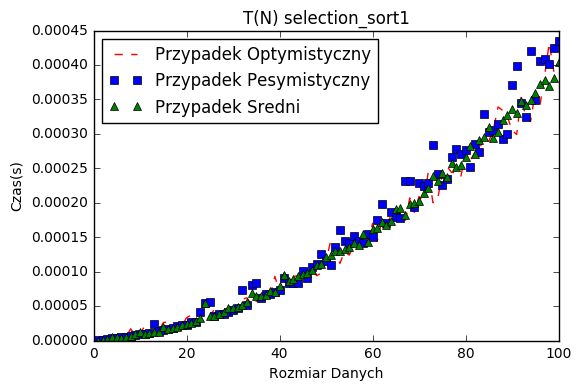

None


In [76]:
print(t(selection_sort1,100))

## Sortowanie bąbelkowe

In [77]:
def bubblesort1(T):
    for i in range(1,len(T)):
        for j in range(len(T)-1,i-1,-1):
            if T[j] < T[j-1]:
                T[j],T[j-1]= T[j-1],T[j]
    return T

In [78]:
print(bubblesort1([51,40,31,28,17,15,14,3]))

[3, 14, 15, 17, 28, 31, 40, 51]


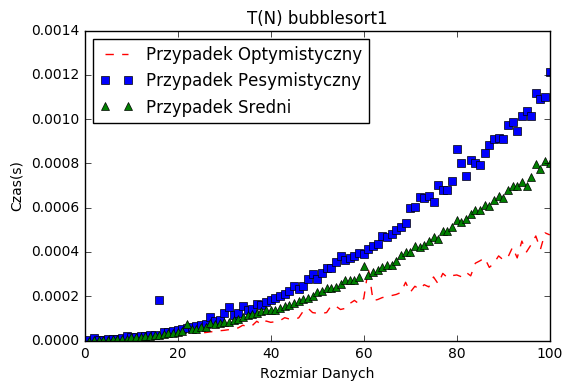

None


In [88]:
print(t(bubblesort1,100))